## **Advanced Regression Assignment**

#### **Problem statement:**
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
1. Which variables are significant in predicting the price of a house, and
2. How well those variables describe the price of a house.


#### **Business objective:**
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


### Import necessary packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.linear_model import Ridge ,Lasso

from sklearn.preprocessing import PolynomialFeatures , StandardScaler ,LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error

import warnings
warnings.filterwarnings("ignore")


### Step 1 : Understanding the data

- Data exploration
- Understanding the data dictonary

####  Data exploration

In [3]:
data=pd.read_csv("/Users/a846871yara.com/Downloads/train.csv");
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.info()
# data First impression:
#1. 81 columns, 1460 Rows
#2. missing data present for multiple colunms
#3. Dataset is a combination of categorical and continous data
#4. SalePrice is the Target variable Y

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Understanding data dictionary


In [5]:
data.MSSubClass.value_counts()
# these are the categorical values that indentify the type of dwelling
#85 =SPLIT FOYER
#60 =	2-STORY 1946 & NEWER

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [6]:
#OverallQual & OverallCond are categorical -ordinal values that determine the overall quality of the property
data.OverallCond.value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

In [7]:
#Provides data about how much of the area is of Low quality finish in square feet
data.LowQualFinSF.value_counts().head()

0      1434
80        3
360       2
205       1
479       1
Name: LowQualFinSF, dtype: int64

In [8]:
#number of bedrooms
data.BedroomAbvGr.head()

0    3
1    3
2    3
3    3
4    4
Name: BedroomAbvGr, dtype: int64

In [9]:
data.MoSold.value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

### Step 2:  Data cleaning , manipulation & visualization

1. Cleaning  
- Handling Missing values
- duplicate rows
- columns with unique data etc

2. Data Manipulation

3. Visualizing Trends in data

#### Data cleaning

In [10]:
#checking for columns with high % of nulls
round(100*data.isna().mean(),2).sort_values(ascending=False)

PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
               ...  
ExterQual       0.00
Exterior2nd     0.00
Exterior1st     0.00
RoofMatl        0.00
SalePrice       0.00
Length: 81, dtype: float64

In [11]:
#dropping columns with very high percentage of null data (above 80% null values)
data =data.drop(["PoolQC","MiscFeature","Alley","Fence"],axis=1 )

In [12]:
#recheck missing value
round(100*data.isna().mean(),2).sort_values(ascending=False).head(20)

FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
KitchenAbvGr     0.00
BedroomAbvGr     0.00
HalfBath         0.00
FullBath         0.00
BsmtHalfBath     0.00
dtype: float64

In [13]:
#dropping the null values from the column where nulls are lesser than 2%
#Electrical
data=data[data.Electrical.notna()]

In [14]:
#MasVnrArea
data = data[data.MasVnrArea.notna()]

In [190]:
#Imputing missing values for columns where null % is greater than 2%
# MasVnrType
# FireplaceQu
# LotFrontage
# GarageCond
# GarageYrBlt
# GarageFinish
# GarageQual
# GarageType
# BsmtFinType2     2.60
# BsmtExposure     2.60
# BsmtFinType1     2.53
# BsmtCond         2.53
# BsmtQual         2.53

In [15]:
#checking the data spread for each of the columns
data.BsmtQual.value_counts()

TA    648
Gd    611
Ex    120
Fa     35
Name: BsmtQual, dtype: int64

In [16]:
#imputing with mode
#MasVnrType
data.MasVnrType.fillna("BrkFace",inplace=True)

In [17]:
#FireplaceQu
data.FireplaceQu.fillna("Gd",inplace=True)


In [18]:
#GarageCond,GarageQual,BsmtCond,BsmtQual
data.GarageCond.fillna("TA",inplace=True)
data.GarageQual.fillna("TA",inplace=True)
data.BsmtCond.fillna("TA",inplace=True)
data.BsmtQual.fillna("TA",inplace=True)

In [19]:
#GarageFinish ,BsmtFinType2,BsmtFinType1
data.GarageFinish.fillna("Unf",inplace=True)
data.BsmtFinType2.fillna("Unf",inplace=True)
data.BsmtFinType1.fillna("Unf",inplace=True)

In [20]:
#GarageType
data.GarageType.fillna("Attchd",inplace=True)

In [21]:
#BsmtExposure
data.BsmtExposure.fillna("No",inplace=True)

In [22]:
#GarageYrBlt
data.GarageYrBlt.fillna("2005.0",inplace=True)

In [23]:
#imputing with median
print(data.LotFrontage.median())
data.LotFrontage.fillna(data.LotFrontage.median(),inplace=True)

69.0


In [24]:
#recheck missing value
round(100*data.isna().mean(),2).sort_values(ascending=False).head(20)

Id              0.0
HalfBath        0.0
FireplaceQu     0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
KitchenQual     0.0
KitchenAbvGr    0.0
BedroomAbvGr    0.0
FullBath        0.0
HeatingQC       0.0
BsmtHalfBath    0.0
BsmtFullBath    0.0
GrLivArea       0.0
LowQualFinSF    0.0
2ndFlrSF        0.0
1stFlrSF        0.0
Electrical      0.0
GarageType      0.0
GarageYrBlt     0.0
dtype: float64

In [25]:
#Removing duplicate rows in the dataframe if any
data = data.drop_duplicates()
data.shape

(1451, 77)

In [26]:
#Remove any columns with all unique values or 1 single vlaue -> no such data found except ID
print(data.nunique().sort_values(ascending=True))

Street           2
Utilities        2
CentralAir       2
PavedDrive       3
HalfBath         3
              ... 
1stFlrSF       748
BsmtUnfSF      777
GrLivArea      858
LotArea       1066
Id            1451
Length: 77, dtype: int64


In [27]:
#Id column has all unique values so we can remove it
data =data.drop(["Id"],axis=True)

In [28]:
#resetting index because we have dropped multiple rows/columns
data.reset_index(inplace=True,drop=True)

In [29]:
data.info()
#all null values handled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1451 entries, 0 to 1450
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   MSZoning       1451 non-null   object 
 2   LotFrontage    1451 non-null   float64
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   object 
 5   LotShape       1451 non-null   object 
 6   LandContour    1451 non-null   object 
 7   Utilities      1451 non-null   object 
 8   LotConfig      1451 non-null   object 
 9   LandSlope      1451 non-null   object 
 10  Neighborhood   1451 non-null   object 
 11  Condition1     1451 non-null   object 
 12  Condition2     1451 non-null   object 
 13  BldgType       1451 non-null   object 
 14  HouseStyle     1451 non-null   object 
 15  OverallQual    1451 non-null   int64  
 16  OverallCond    1451 non-null   int64  
 17  YearBuilt      1451 non-null   int64  
 18  YearRemo

#### Data Manipulation

In [30]:
# Indentifying all numeric (float and int) variables in the dataset
data_numeric = data.select_dtypes(include=['float64', 'int64'])
data_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [31]:
#storing them in a list
numeric_cols = data_numeric.columns.to_list()

In [ ]:
numeric_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [32]:
#removing the categorical columns from the list of numeric columns
##MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MoSold,YrSold
addn_cols = ["MSSubClass","OverallQual","OverallCond","YearBuilt","YearRemodAdd","MoSold","YrSold"]
for col in addn_cols:
    numeric_cols.remove(col);

In [33]:
#Also converting their datatypes to categorical
#MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MoSold,YrSold
for col in addn_cols:
    data[col] = data[col].astype('object')


In [34]:
#indentifying all categorical variables in the dataset
data_category = data.select_dtypes(include=['object'])
data_category.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,2003.0,RFn,TA,TA,Y,2,2008,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,1976.0,RFn,TA,TA,Y,5,2007,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,2001.0,RFn,TA,TA,Y,9,2008,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,1998.0,Unf,TA,TA,Y,2,2006,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,2000.0,RFn,TA,TA,Y,12,2008,WD,Normal


In [35]:
len(numeric_cols)

29

In [36]:
cat_cols = data_category.columns.to_list()

#### Visualizing Trends

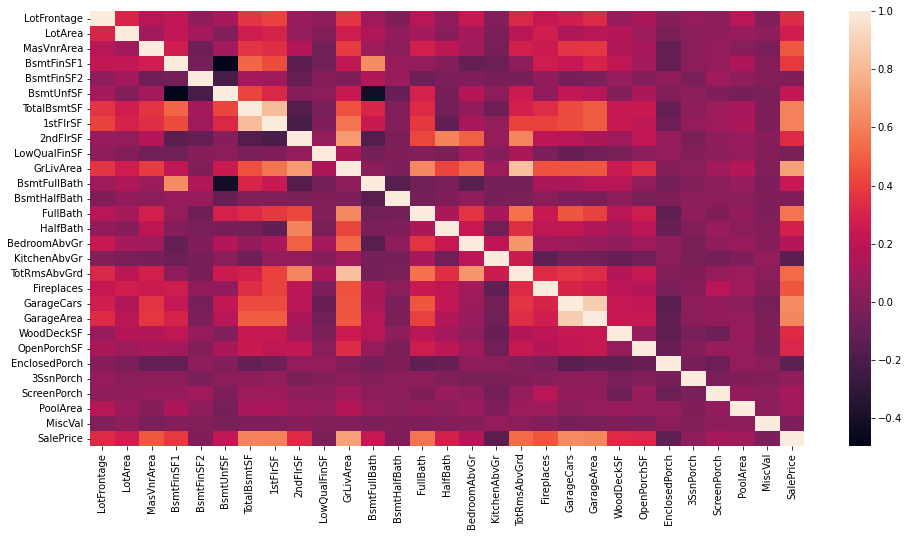

In [37]:
#Visualising the correlation between continuous values
# figure size
plt.figure(figsize=(16,8))
sns.heatmap(data[numeric_cols].corr())
plt.show()

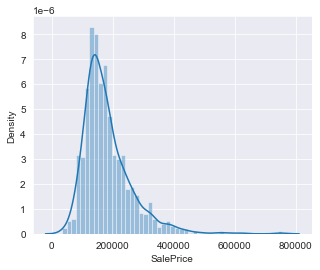

In [38]:
## analyse the target variable 'SalePrice'
plt.figure(figsize=[5,4])
sns.set_style('darkgrid')
sns.distplot(data['SalePrice']);


In [39]:
## Check the skewness of target variable
data['SalePrice'].skew()
#The target variable is right-skewed as the skewness is greater than 1

1.8831110462405252

In [40]:
## Log transform the target variable
data['SalePrice'] = np.log(data['SalePrice'])

## Check the skewness of target variable again. Skewness is under 1
data['SalePrice'].skew()

0.12193841342297697

  ### Step 3: Preparing the data for model building
- Label encoding
- Standardization
- Split into X and y
- Divide into test and train split

#### Label Encoding

In [41]:
encoder =LabelEncoder()

In [42]:
#encoding all cat columns that are nominal in nature (except for OverallQual and OverallCond )

cat_cols.remove("OverallQual")
cat_cols.remove("OverallCond")

In [43]:
#verifying each of the columns for unique values before encoding them
for col in cat_cols:
      print(col +" : ",data[col].unique())

MSSubClass :  [60 20 70 50 190 45 90 120 30 85 80 160 75 180 40]
MSZoning :  ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street :  ['Pave' 'Grvl']
LotShape :  ['Reg' 'IR1' 'IR2' 'IR3']
LandContour :  ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities :  ['AllPub' 'NoSeWa']
LotConfig :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope :  ['Gtl' 'Mod' 'Sev']
Neighborhood :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 :  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 :  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType :  ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle :  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
YearBuilt :  [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967

In [44]:
for col in cat_cols:
    data[col] = encoder.fit_transform(data[col].astype(str))

In [45]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,9,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,4,2,8,4,12.247694
1,4,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,7,1,8,4,12.109011
2,9,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,11,2,8,4,12.317167
3,10,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,4,0,8,0,11.849398
4,9,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,3,2,8,4,12.429216


#### Split into X and y

In [46]:
#Target variable stored in y
y=data["SalePrice"]

In [47]:
#all predictors in variable X
X = data.drop(["SalePrice"],axis=1)

In [48]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,9,3,65.0,8450,1,3,3,0,4,0,...,61,0,0,0,0,0,4,2,8,4
1,4,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,0,7,1,8,4
2,9,3,68.0,11250,1,0,3,0,4,0,...,42,0,0,0,0,0,11,2,8,4
3,10,3,60.0,9550,1,0,3,0,0,0,...,35,272,0,0,0,0,4,0,8,0
4,9,3,84.0,14260,1,0,3,0,2,0,...,84,0,0,0,0,0,3,2,8,4


In [49]:
y[:5]

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

#### Standardization

In [50]:
# scaling the features - necessary before using Ridge or Lasso
scaler = StandardScaler()
#storing all column names for future use as column names are  lost after scaling
all_cols = X.columns

In [51]:
X_std= scaler.fit_transform(X)

In [52]:
X_std

array([[ 0.78629353, -0.05276102, -0.2198875 , ...,  0.13898538,
         0.31255104,  0.2102448 ],
       [-0.62537674, -0.05276102,  0.46079113, ..., -0.61350636,
         0.31255104,  0.2102448 ],
       [ 0.78629353, -0.05276102, -0.08375177, ...,  0.13898538,
         0.31255104,  0.2102448 ],
       ...,
       [ 1.06862759, -0.05276102, -0.17450892, ...,  1.64396887,
         0.31255104,  0.2102448 ],
       [-0.62537674, -0.05276102, -0.08375177, ...,  1.64396887,
         0.31255104,  0.2102448 ],
       [-0.62537674, -0.05276102,  0.23389825, ...,  0.13898538,
         0.31255104,  0.2102448 ]])

#### Divide into test and train split

In [53]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_std, y,
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### Step 4:  Model Building and evaluation
- Ridge regression
- Lasso regression
- Comparison of the 2 models
- Find Best aplha

####Model 1 : Ridge Regression

In [54]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low,
# it will not handle the overfitting

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
ridge = Ridge()

In [55]:
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [56]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [57]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.01322114 -0.01266854 -0.00916183  0.01327639  0.0130196  -0.01275295
  0.0108234  -0.0015167  -0.00602015  0.01472616  0.00593982  0.00061129
 -0.01956037 -0.00846785 -0.01444633  0.0839926   0.03435193  0.03266744
  0.01955673  0.00937335  0.00669392 -0.00776983  0.01298842  0.00131795
  0.00625125 -0.00618183  0.00542578  0.00775836 -0.02287402  0.0069037
 -0.00791598 -0.01588365  0.0040556   0.00277147  0.00670582  0.00449496
  0.0112336  -0.00617123 -0.01603771  0.02134861  0.00431774  0.03470516
  0.02089496  0.00477847  0.04319955  0.02527872  0.00252043  0.02065771
  0.01231193  0.0159984  -0.01101319 -0.02448776  0.01993323  0.02006233
  0.02154324 -0.00152865 -0.0144714  -0.0124265  -0.01209865  0.04628378
  0.01290652 -0.00260596  0.00219106  0.01702612  0.01518454 -0.00233537
  0.010831    0.00727299  0.01640025 -0.01340003 -0.0112542   0.01220301
 -0.00754085  0.00319814  0.02557835]


In [58]:
#Make predictions on Test and train data
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

In [59]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 score(Train): ",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(" R2 score(Test): ",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS(Train):",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS(Test):",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE(Train):",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE(Test):",mse_test_lr)
metric.append(mse_test_lr**0.5)


R2 score(Train):  0.8849428204675737
 R2 score(Test):  0.8737359813071722
RSS(Train): 18.712009940224043
RSS(Test): 8.6768607066154
MSE(Train): 0.018435477773619747
MSE(Test): 0.019901056666549084


##### Plotting R2 Score against different values of alpha for train and test sets to find optimal alpha
 Ridge Regression

In [60]:
## Create a dataframe of ridge cross validation results
ridgeCV_results= pd.DataFrame(model_cv.cv_results_)
ridgeCV_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003312,0.001709,0.000695,0.000097,0.0001,{'alpha': 0.0001},-0.117004,-0.098201,-0.100403,-0.099189,...,-0.103743,0.006906,27,-0.077635,-0.094813,-0.094466,-0.093791,-0.093104,-0.090762,0.006589
1,0.002603,0.000273,0.000680,0.000088,0.001,{'alpha': 0.001},-0.117004,-0.098201,-0.100403,-0.099189,...,-0.103743,0.006906,26,-0.077635,-0.094813,-0.094466,-0.093791,-0.093104,-0.090762,0.006589
2,0.002563,0.000408,0.001131,0.000606,0.01,{'alpha': 0.01},-0.117003,-0.098200,-0.100402,-0.099188,...,-0.103742,0.006906,25,-0.077635,-0.094813,-0.094465,-0.093791,-0.093103,-0.090761,0.006589
3,0.001733,0.000341,0.000521,0.000179,0.05,{'alpha': 0.05},-0.117000,-0.098198,-0.100399,-0.099182,...,-0.103739,0.006907,24,-0.077635,-0.094811,-0.094464,-0.093790,-0.093101,-0.090760,0.006589
4,0.001553,0.000082,0.000459,0.000036,0.1,{'alpha': 0.1},-0.116997,-0.098196,-0.100396,-0.099176,...,-0.103734,0.006907,23,-0.077635,-0.094809,-0.094462,-0.093789,-0.093099,-0.090759,0.006588


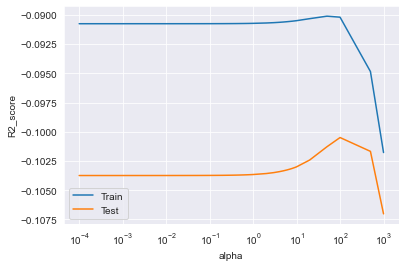

In [61]:
## Plotting R2 score vs alpha values
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

✅From the graph ,we can see that the optimal value of alpha is 100

#### Model 2 : Lasso Regression

In [62]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [63]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [64]:
#Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [65]:
lasso.coef_

array([ 0.01387998, -0.01470187, -0.00924916,  0.01366352,  0.01199035,
       -0.01228355,  0.01167443, -0.00084961, -0.00532409,  0.01496208,
        0.00335018, -0.        , -0.02233697, -0.00969713, -0.01717661,
        0.1042458 ,  0.03888277,  0.04735555,  0.0156934 ,  0.00781741,
        0.00409933, -0.00550453,  0.01048981,  0.        ,  0.00263476,
       -0.        ,  0.00457647,  0.00252672, -0.02252161,  0.00639802,
       -0.00540309, -0.01686759, -0.        ,  0.        ,  0.00319146,
        0.00085454,  0.00258267, -0.00615578, -0.01418486,  0.02022954,
        0.00322181,  0.023395  ,  0.        ,  0.00141361,  0.08356599,
        0.02779023,  0.00182529,  0.01213189,  0.00728215,  0.01631752,
       -0.00797501, -0.02473815,  0.01274275,  0.01992594,  0.01786359,
       -0.00148982, -0.01425668, -0.01388634, -0.00842205,  0.05880435,
       -0.        , -0.00075619,  0.        ,  0.01560975,  0.01510906,
       -0.00131435,  0.0109729 ,  0.00709768,  0.01673079, -0.01

In [66]:
#Predict using Lasso
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

In [67]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 score(Train): ",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(" R2 score(Test): ",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS(Train):",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS(Test):",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE(Train):",mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE(Test):",mse_test_lr)
metric2.append(mse_test_lr**0.5)


R2 score(Train):  0.8866674229429217
 R2 score(Test):  0.8690651547959187
RSS(Train): 18.43153393001077
RSS(Test): 8.99783980614421
MSE(Train): 0.01815914672907465
MSE(Test): 0.020637247261798646


##### Plotting R2 Score against different values of alpha for train and test sets to find optimal alpha
#####  For Model 2 : Lasso Regression

In [68]:
lassoCV_results= pd.DataFrame(model_cv.cv_results_)
lassoCV_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.051735,0.003020,0.000803,0.000080,0.0001,{'alpha': 0.0001},-0.116737,-0.097991,-0.100223,-0.098981,...,-0.103519,0.006881,3,-0.077593,-0.094705,-0.094324,-0.093712,-0.093003,-0.090667,0.006562
1,0.008402,0.001122,0.000599,0.000122,0.001,{'alpha': 0.001},-0.115605,-0.096529,-0.099240,-0.098108,...,-0.102313,0.006889,1,-0.077592,-0.094070,-0.093626,-0.093355,-0.092766,-0.090282,0.006359
2,0.003068,0.000361,0.000527,0.000057,0.01,{'alpha': 0.01},-0.110261,-0.095775,-0.099752,-0.100430,...,-0.102411,0.005067,2,-0.083601,-0.100506,-0.098463,-0.097496,-0.098490,-0.095711,0.006134
3,0.002242,0.000325,0.000661,0.000149,0.05,{'alpha': 0.05},-0.140094,-0.129709,-0.123436,-0.133185,...,-0.131239,0.005433,4,-0.114991,-0.132483,-0.130783,-0.131597,-0.129418,-0.127854,0.006511
4,0.002143,0.000299,0.000570,0.000029,0.1,{'alpha': 0.1},-0.179738,-0.160862,-0.157341,-0.162524,...,-0.163433,0.008435,5,-0.151835,-0.164791,-0.164709,-0.161886,-0.162872,-0.161219,0.004820


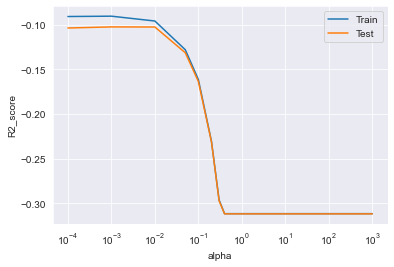

In [69]:
## Plotting R2 score vs alpha values
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

#### Comparison of the 2 models

In [70]:
# Creating a table which contain all the metrics

pd.options.display.float_format = "{:,.2f}".format

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'],
        'Ridge Regression': metric
        }

rg_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Ridge Regression'] )

#rg_metric = pd.Series(metric, name = 'Ridge Regression')
ls_metric = pd.Series(metric2, name = 'Lasso Regression')

final_metric = pd.concat([rg_metric, ls_metric], axis = 1)


final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.88,0.89
1,R2 Score (Test),0.87,0.87
2,RSS (Train),18.71,18.43
3,RSS (Test),8.68,9.00
4,MSE (Train),0.14,0.13
5,MSE (Test),0.14,0.14


#### 📌 Optimal value of lambda
1. Ridge Regression = 100
2. Lasso Regression = 0.001



### Step 5: Observing the changes on coefficients after regularization

In [71]:
##create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=all_cols)
betas.rows = all_cols

In [72]:
len(betas)

75

In [73]:
#Filling the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [74]:
#all features and the coefficients
betas

,Ridge,Lasso
MSSubClass,0.01,0.01
MSZoning,-0.01,-0.01
LotFrontage,-0.01,-0.01
LotArea,0.01,0.01
Street,0.01,0.01
...,...,...
MiscVal,-0.01,-0.01
MoSold,0.01,0.01
YrSold,-0.01,-0.01
SaleType,0.00,0.00


In [75]:
## View the features removed by Lasso
betas[betas['Lasso']==0]

,Ridge,Lasso
Condition1,0.00,-0.00
MasVnrType,0.00,0.00
ExterQual,-0.01,-0.00
BsmtFinSF1,0.00,-0.00
BsmtFinType2,0.00,0.00
2ndFlrSF,0.02,0.00
GarageArea,0.01,-0.00
GarageCond,0.00,0.00


### Step 6 : Business Inferences on the Models

In [76]:
final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.88,0.89
1,R2 Score (Test),0.87,0.87
2,RSS (Train),18.71,18.43
3,RSS (Test),8.68,9.00
4,MSE (Train),0.14,0.13
5,MSE (Test),0.14,0.14


Identifying most significant features in predicting the value of a house, both according to Ridge model and Lasso model

In [77]:
## View the top 10 coefficients of Ridge regression
betas['Ridge'].sort_values(ascending=False)[:10]

OverallQual     0.08
GarageCars      0.05
GrLivArea       0.04
1stFlrSF        0.03
OverallCond     0.03
YearBuilt       0.03
SaleCondition   0.03
BsmtFullBath    0.03
Fireplaces      0.02
CentralAir      0.02
Name: Ridge, dtype: float64

In [78]:
## To interpret the ridge coefficients in terms of target, we have to take inverse log
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

OverallQual     1.09
GarageCars      1.05
GrLivArea       1.04
1stFlrSF        1.04
OverallCond     1.03
YearBuilt       1.03
SaleCondition   1.03
BsmtFullBath    1.03
Fireplaces      1.02
CentralAir      1.02
Name: Ridge, dtype: float64

In [79]:
## View the top 10 coefficients of Lasso
betas['Lasso'].sort_values(ascending=False)[:10]

OverallQual     0.10
GrLivArea       0.08
GarageCars      0.06
YearBuilt       0.05
OverallCond     0.04
SaleCondition   0.03
BsmtFullBath    0.03
1stFlrSF        0.02
CentralAir      0.02
Functional      0.02
Name: Lasso, dtype: float64

In [80]:
## To interpret the lasso coefficients in terms of target, we have to take inverse log
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

OverallQual     1.11
GrLivArea       1.09
GarageCars      1.06
YearBuilt       1.05
OverallCond     1.04
SaleCondition   1.03
BsmtFullBath    1.03
1stFlrSF        1.02
CentralAir      1.02
Functional      1.02
Name: Lasso, dtype: float64


## 📌 The variables significant in predicting the price of a house are: -

1. OverallQual
2. GrLivArea
3. GarageCars
4. YearBuilt
5. OverallCond
6. SaleCondition
7. BsmtFullBath
8. 1stFlrSF
9. CentralAir
10. Fireplaces
11. Functional


## 📌 How well those variables describe the price of a house?

Some of the top factors are :

▶ OverallQual = If the overall material and finish of the house is high, the price of house will increase by 1.09 to 1.11 times

▶ GrLivArea = an increase of 1 square foot of house area above ground, the price will increase by 1.04 to 1.09 times

▶ GarageCars = With an increasing  Garage size , the price can increase by
1.05-1.06 times

▶ YearBuilt = Newer homes can fetch 1.03 - 1.05 times the price

▶  OverallCond = If the overall condition of the house is excellent, the price of the house can be 1.05 times higher

## **Part 2: Solving Subjective questions**

#### **Question 1**

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?


##### **Answer 1:**

The Optimal value of lambda are
Ridge Regression = 100
Lasso Regression = 0.001


In [81]:
final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.88,0.89
1,R2 Score (Test),0.87,0.87
2,RSS (Train),18.71,18.43
3,RSS (Test),8.68,9.00
4,MSE (Train),0.14,0.13
5,MSE (Test),0.14,0.14


Doubling the value of lambda would be
1. Ridge Regression = 200
2. Lasso Regression = 0.002

In [82]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_std, y,
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [83]:
# Ridge regression with alpha = 200
alpha = 200
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

#Make predictions on Test and train data
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

In [84]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 score(Train): ",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(" R2 score(Test): ",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS(Train):",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS(Test):",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE(Train):",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE(Test):",mse_test_lr)
metric.append(mse_test_lr**0.5)

R2 score(Train):  0.8814724451748077
 R2 score(Test):  0.877899751927925
RSS(Train): 19.27640494137426
RSS(Test): 8.390726477207874
MSE(Train): 0.018991531961945085
MSE(Test): 0.019244785498183196


In [85]:
#Lasso Regression with alpha = 0.002

alpha =0.002
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

#Predict using Lasso
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

In [86]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 score(Train): ",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(" R2 score(Test): ",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS(Train):",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS(Test):",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE(Train):",mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE(Test):",mse_test_lr)
metric2.append(mse_test_lr**0.5)

R2 score(Train):  0.8850032986272947
 R2 score(Test):  0.875620451759615
RSS(Train): 18.70217424000555
RSS(Test): 8.547359936793097
MSE(Train): 0.0184257874285769
MSE(Test): 0.019604036552277746


In [87]:
#Model comparison

pd.options.display.float_format = "{:,.2f}".format

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'],
        'Ridge Regression': metric
        }

rg_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Ridge Regression'] )

#rg_metric = pd.Series(metric, name = 'Ridge Regression')
ls_metric = pd.Series(metric2, name = 'Lasso Regression')

final_metric = pd.concat([rg_metric, ls_metric], axis = 1)


final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.88,0.89
1,R2 Score (Test),0.88,0.88
2,RSS (Train),19.28,18.70
3,RSS (Test),8.39,8.55
4,MSE (Train),0.14,0.14
5,MSE (Test),0.14,0.14


In [88]:
#identifying top predictors
##create empty datafame with all the independent variables as indices
betas2 = pd.DataFrame(index=all_cols)
betas2.rows = all_cols
betas2['Ridge'] = ridge.coef_
betas2['Lasso'] = lasso.coef_
betas

,Ridge,Lasso
MSSubClass,0.01,0.01
MSZoning,-0.01,-0.01
LotFrontage,-0.01,-0.01
LotArea,0.01,0.01
Street,0.01,0.01
...,...,...
MiscVal,-0.01,-0.01
MoSold,0.01,0.01
YrSold,-0.01,-0.01
SaleType,0.00,0.00


In [89]:
## View the features removed by Lasso
betas2[betas2['Lasso']==0]

,Ridge,Lasso
Condition1,0.00,-0.00
Exterior1st,-0.00,-0.00
MasVnrType,0.00,0.00
ExterQual,-0.01,-0.00
BsmtFinSF1,0.01,0.00
BsmtFinType2,0.00,0.00
BsmtUnfSF,0.00,0.00
2ndFlrSF,0.02,0.00
LowQualFinSF,0.00,0.00
GarageArea,0.02,0.00


#### **Question 2**
You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

***Answer :***
The model to choose will depend on the use case.
If feature selection is the goal then I will choose the Lasso model with alpha=0.002
If the goal is to reduce the magnitude of the coefficients , I will choose Ridge regression with alpha =100


#### **Question 3**
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


In [90]:
## View the inital top 5 coefficients of Lasso
betas['Lasso'].sort_values(ascending=False)[:5]

OverallQual   0.10
GrLivArea     0.08
GarageCars    0.06
YearBuilt     0.05
OverallCond   0.04
Name: Lasso, dtype: float64